In [1]:
import SiemensQuadraProperties as sqp
import ExplorerProperties as ep
from ActivityTools import *
from SimulationDataset import *

import matplotlib.pyplot as mpl

In [2]:
# the activity calculation is usually quoted divided by the TOTAL PHANTOM VOLUME
# explorer paper says 22L for 70cm phantom, I say 22.64
# so 1e9 Bq == 44kBq/cc (or ml, since cc==ml)
# from the explorer plots, 16 kBq/cc == 0.36e9 Bq

Re-using previous simulation
347841.0 events loaded (1000000 simulated) with average 1.1461529836908242 hits/event
Re-using previous simulation
107536.0 events loaded (1000000 simulated) with average 1.0075881565243268 hits/event


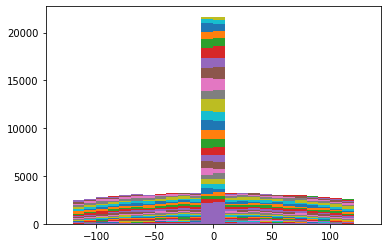

Re-using previous simulation
396061.0 events loaded (1000000 simulated) with average 1.1579201183656054 hits/event
Re-using previous simulation
235458.0 events loaded (1000000 simulated) with average 1.0006752796677114 hits/event


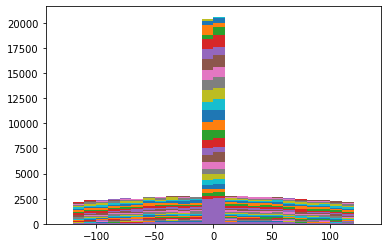

In [3]:
def NECRatTimeF18( tracerData, crystalData, crystalActivity, detectorRadius, phantomLength, simulationWindow=1E-2, coincidenceWindow=4.7E-9, zWindow=325.0 ):

    # get volume in cc
    phantomRadius = 20.3 / 2.0
    phantomVolume = phantomRadius * phantomRadius * math.pi * phantomLength / 10.0 # assume length in mm
    
    necrAtTime = []
    trueAtTime = []
    rPlusSAtTime = []
    activityAtTime = []
    for time in range( 0, 700, 20 ):
        timeSec = float(time) * 60.0
        activity = F18ActivityAtTime( 1100E6, timeSec )

        necr, true, rPlusS = DetectedCoincidences( [activity, crystalActivity], [tracerData, crystalData], simulationWindow, coincidenceWindow, detectorRadius, ZMin=-zWindow, ZMax=zWindow )
        necrAtTime.append( necr )
        trueAtTime.append( true )
        rPlusSAtTime.append( rPlusS )
        activityAtTime.append( activity / phantomVolume )
    
    return activityAtTime, necrAtTime, trueAtTime, rPlusSAtTime

tracerData = CreateDataset( 1024, "Siemens", 700, "LinearF18", 1000000, 435.0, 585.0 )
crystalData = CreateDataset( 1024, "Siemens", 1024, "Siemens", 1000000, 435.0, 585.0 )
activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, sqp.Lu176decaysInMass( sqp.DetectorMass() ), sqp.DetectorRadius(), 700.0 )
mpl.show()

tracerData = CreateDataset( 1850, "Explorer", 700, "LinearF18", 1000000, 430.0, 645.0 )
crystalData = CreateDataset( 1850, "Explorer", 1850, "Explorer", 1000000, 430.0, 645.0 )
activityAtTimeExplorer, necrAtTimeExplorer, trueAtTimeExplorer, rPlusSAtTimeExplorer= NECRatTimeF18( tracerData, crystalData, ep.Lu176decaysInMass( ep.DetectorMass() ), ep.DetectorRadius(), 700.0 )
mpl.show()

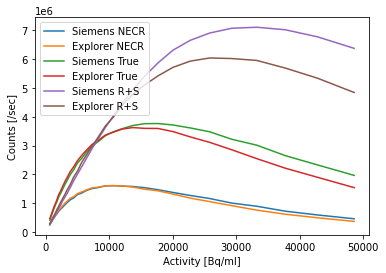

In [7]:
labels = [ "Siemens NECR", "Explorer NECR", "Siemens True", "Explorer True", "Siemens R+S", "Explorer R+S" ]
mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens, label=labels[0] )
mpl.plot( activityAtTimeExplorer, necrAtTimeExplorer, label=labels[1] )
mpl.plot( activityAtTimeSiemens, trueAtTimeSiemens, label=labels[2] )
mpl.plot( activityAtTimeExplorer, trueAtTimeExplorer, label=labels[3] )
mpl.plot( activityAtTimeSiemens, rPlusSAtTimeSiemens, label=labels[4] )
mpl.plot( activityAtTimeExplorer, rPlusSAtTimeExplorer, label=labels[5] )
mpl.legend( labels )
mpl.xlabel( "Activity [Bq/ml]")
mpl.ylabel( "Counts [/sec]")
mpl.show()

In [5]:
# Debug information about the background
print( "Siemens Quadra mass :", sqp.DetectorMass() )
print( "Siemens Quadra background (Bq) :", sqp.Lu176decaysInMass( sqp.DetectorMass() ) )
print( "Explorer mass :", ep.DetectorMass() )
print( "Explorer background (Bq) :", ep.Lu176decaysInMass( ep.DetectorMass() ) )

Siemens Quadra mass : 368574.46400000004
Siemens Quadra background (Bq) : 14726005.989989998
Explorer mass : 552590.79579648
Explorer background (Bq) : 20646468.60786598


Simulation complete
227364.0 events loaded (1000000 simulated) with average 1.0797311799581288 hits/event
Simulation complete
106987.0 events loaded (1000000 simulated) with average 1.0070288913606327 hits/event
Simulation complete
258324.0 events loaded (1000000 simulated) with average 1.0941917901549991 hits/event
Simulation complete
106675.0 events loaded (1000000 simulated) with average 1.0069744551206936 hits/event
Simulation complete
284661.0 events loaded (1000000 simulated) with average 1.1098288841815351 hits/event
Simulation complete
106923.0 events loaded (1000000 simulated) with average 1.007612955117234 hits/event
Simulation complete
306615.0 events loaded (1000000 simulated) with average 1.1242176671069581 hits/event
Simulation complete
107068.0 events loaded (1000000 simulated) with average 1.0073504688609107 hits/event
Simulation complete
332115.0 events loaded (1000000 simulated) with average 1.1387501317314785 hits/event
Simulation complete
107307.0 events loaded (100

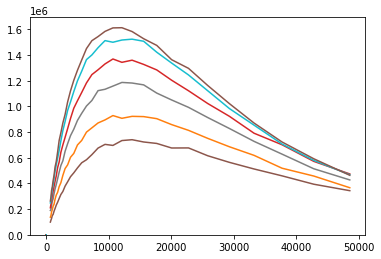

In [8]:
# Investigate ideal detector length with Siemens geometry
def PeakNECRWithLength( phantomLength, simulationWindow=1E-2, coincidenceWindow=4.7E-9, zWindow=325.0 ):
    
    detectorLengths = [ 500, 600, 700, 800, 900, 1000 ]
    maxNECR = []
    
    for detectorLength in detectorLengths:
    
        tracerData = CreateDataset( detectorLength, "Siemens", phantomLength, "LinearF18", 1000000, 435.0, 585.0 )
        crystalData = CreateDataset( detectorLength, "Siemens", detectorLength, "Siemens", 1000000, 435.0, 585.0 )
        crystalActivity = sqp.Lu176decaysInMass( sqp.DetectorMassLength( detectorLength ) )
        
        activityAtTimeSiemens, necrAtTimeSiemens, trueAtTimeSiemens, rPlusSAtTimeSiemens = NECRatTimeF18( tracerData, crystalData, crystalActivity, sqp.DetectorRadius(), phantomLength )
        
        mpl.plot( activityAtTimeSiemens, necrAtTimeSiemens )
        maxNECR.append( max( necrAtTimeSiemens ) )
        
    return detectorLengths, maxNECR

detectorLengths, maxNECR = PeakNECRWithLength( 700 )

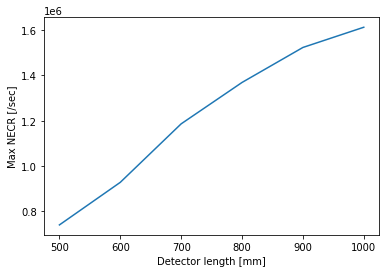

In [9]:
mpl.plot( detectorLengths, maxNECR )
mpl.xlabel( "Detector length [mm]")
mpl.ylabel( "Max NECR [/sec]")
mpl.show()